## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
  * 看起來，overfitting 的情況更嚴重
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度
  * 234.17720913887024 seconds --- for GPU
  * 918.2194638252258 seconds --- for CPU only

In [1]:
## 確認硬體資源
"""
Your code here
"""
!nvidia-smi

Mon Mar 25 06:50:34 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 415.27       Driver Version: 415.27       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2070    Off  | 00000000:02:00.0 Off |                  N/A |
|  5%   41C    P8     1W / 175W |    131MiB /  7952MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Try to enable GPU (optional)

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = ((x - x.min()) / x.max()-x.min())*2 -1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
outp

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
start_time = time.time()
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
print("--- %s seconds ---" % (time.time() - start_time))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 197us/step - loss: 1.7321 - acc: 0.3846 - val_loss: 1.5386 - val_acc: 0.4561
Epoch 2/100
50000/50000 [==============================] - 9s 183us/step - loss: 1.4875 - acc: 0.4752 - val_loss: 1.4481 - val_acc: 0.4879
Epoch 3/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.3631 - acc: 0.5179 - val_loss: 1.4480 - val_acc: 0.4974
Epoch 4/100
50000/50000 [==============================] - 9s 183us/step - loss: 1.2753 - acc: 0.5492 - val_loss: 1.3814 - val_acc: 0.5196
Epoch 5/100
50000/50000 [==============================] - 9s 183us/step - loss: 1.1914 - acc: 0.5804 - val_loss: 1.3585 - val_acc: 0.5198
Epoch 6/100
50000/50000 [==============================] - 9s 183us/step - loss: 1.1104 - acc: 0.6085 - val_loss: 1.3444 - val_acc: 0.5317
Epoch 7/100
50000/50000 [==============================] - 9s 184us

50000/50000 [==============================] - 9s 183us/step - loss: 0.1099 - acc: 0.9635 - val_loss: 3.7297 - val_acc: 0.5247
Epoch 58/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.0981 - acc: 0.9669 - val_loss: 3.6730 - val_acc: 0.5334
Epoch 59/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.0962 - acc: 0.9673 - val_loss: 3.6990 - val_acc: 0.5281
Epoch 60/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.1004 - acc: 0.9671 - val_loss: 3.7252 - val_acc: 0.5242
Epoch 61/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.1042 - acc: 0.9659 - val_loss: 3.6727 - val_acc: 0.5282
Epoch 62/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.0870 - acc: 0.9706 - val_loss: 3.8802 - val_acc: 0.5257
Epoch 63/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.0978 - acc: 0.9681 - val_loss: 3.7151 - val_acc: 0.5237
Epoch 64/100
50000/50000 [=======

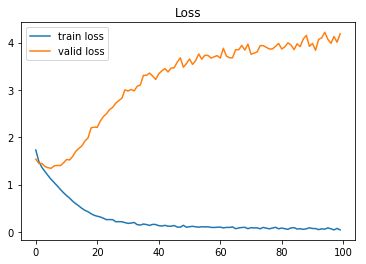

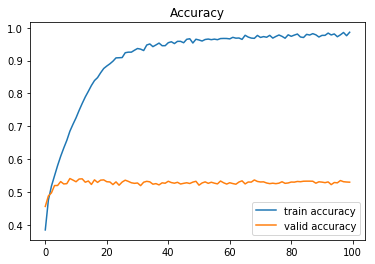

In [10]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()